In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from scipy.fft import fft
import cmath

In [2]:
fs1, data1 = read('Alesis-Fusion-Nylon-String-Guitar-C4.wav')
fs2, data2 = read('E-Mu-Proteus-FX-AcStereo-C3.wav')

<ipython-input-2-897ed5808425>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs1, data1 = read('Alesis-Fusion-Nylon-String-Guitar-C4.wav')
<ipython-input-2-897ed5808425>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs2, data2 = read('E-Mu-Proteus-FX-AcStereo-C3.wav')


In [6]:
fs1,fs2

(44100, 44100)

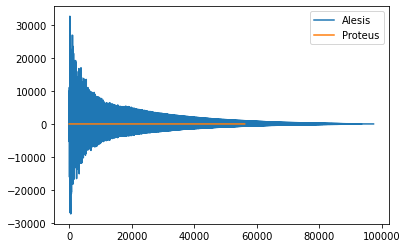

In [14]:
plt.plot(data1[:,1],label = 'Alesis')
plt.plot(data2[:,1],label = 'Proteus')
plt.legend()

In [3]:
d1 = data1[:,1]/np.max(data1[:,1])
d2 = data2[:,1]/np.max(data2[:,1])

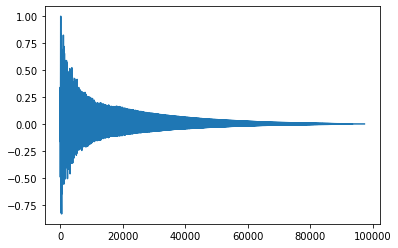

In [4]:
plt.plot(d1)

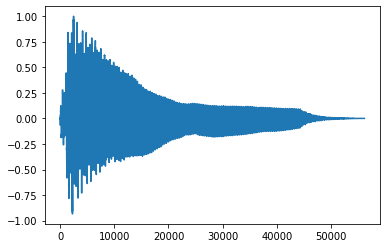

In [5]:
plt.plot(d2)

In [7]:
sample_cap = 28000
audio1 = d1[:sample_cap]
audio2 = d2[:sample_cap]

In [8]:
audio1

array([-0.00155835, -0.00238335, -0.00305558, ..., -0.06826168,
       -0.06480887, -0.06129496])

In [9]:
chunksize = 400
sampled_chunksize = sample_cap/chunksize

In [10]:
sampled_chunksize

70.0

In [11]:
#Creating fingerprint
def fingerprint(audio,chunksize,sample_cap):
    results = []
    sampled_chunksize = sample_cap/chunksize
    for i in range(int(sampled_chunksize)):
        chunk_array = []
        for j in range(chunksize):
            chunk_array.append(complex(audio[i*chunksize + j],0))
        results.append(fft(chunk_array))
    
    return results

In [12]:
frequencies = [40, 80, 120, 180, 300]
FUZ_FACTOR = 2
def get_index(freq):
    i = 0;
    while (frequencies[i] < freq) :
        i += 1
    return i

def make_hash(p1,p2,p3,p4,FUZ_FACTOR):
    return (p4 - (p4 % FUZ_FACTOR)) * 100000000 + (p3 - (p3 % FUZ_FACTOR))* 100000 + (p2 - (p2 % FUZ_FACTOR)) * 100 + (p1 - (p1 % FUZ_FACTOR));


def get_hash(results):
    audio_hash = []
    points = np.zeros((len(results),4))
    for i in range(len(results)):
        for j in range(len(frequencies) - 1):
            index = np.argmax(abs(results[i][frequencies[j]:frequencies[j+1]]))
            freq = index + frequencies[j]
            points[i][j] = freq
        
        h = make_hash(points[i][0],points[i][1],points[i][2],points[i][3],FUZ_FACTOR)
        audio_hash.append(h)
    
#     print(points)
    return audio_hash
            
            
            

In [13]:
results = fingerprint(audio1,chunksize,sample_cap)

In [14]:
np.shape(results)

(70, 400)

In [15]:
audio1_hash = get_hash(results)

In [16]:
results = fingerprint(audio2,chunksize,sample_cap)
audio2_hash = get_hash(results)

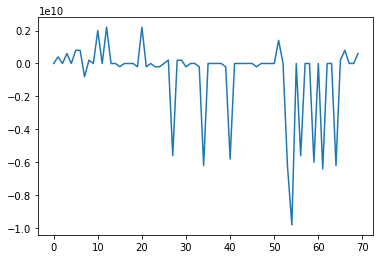

In [17]:
plt.plot(np.array(audio1_hash) - np.array(audio2_hash))
# plt.plot(audio2_hash)

In [223]:
hash_diff = np.array(audio1_hash) - np.array(audio2_hash)

In [224]:
print(np.max(abs(hash_diff))/np.std(hash_diff))

4.2513851497390105


In [18]:
audio4 = audio1*3

In [19]:
results = fingerprint(audio4,chunksize,sample_cap)
audio4_hash = get_hash(results)

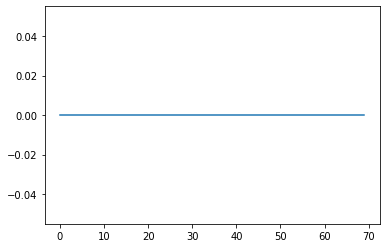

In [20]:
plt.plot(np.array(audio1_hash) - np.array(audio4_hash))

In [230]:
hash_diff = np.array(audio1_hash) - np.array(audio4_hash)

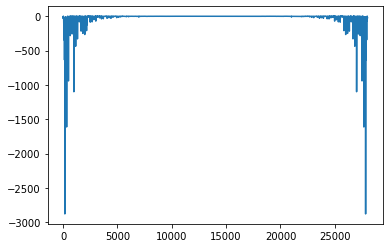

In [232]:
plt.plot(abs(fft(audio1)) - abs(fft(audio4)))
# plt.plot(fft(audio4))

In [21]:
c = 0
for a,b in zip(audio1_hash,audio2_hash):
    if a-b != 0:
        c += 1
print(c)

65
